In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import ppscore as pps

In [2]:
def heatmap(df):
    return sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [3]:
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

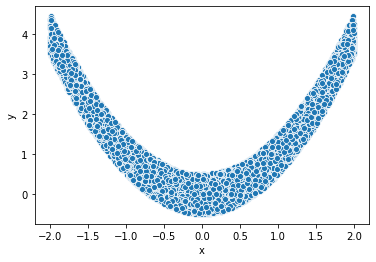

In [4]:
sns.scatterplot(x="x", y="y", data=df.sample(10_000))

In [5]:
matrix = pps.matrix(df)
matrix

,x,error,y
x,1.000000,0,0
error,0.000000,1,0
y,0.663011,0,1


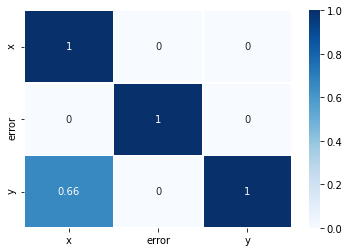

In [6]:
heatmap(matrix)

In [7]:
pps.score(df, "x", "y")

{'x': 'x',
 'y': 'y',
 'task': 'regression',
 'ppscore': 0.663010916444478,
 'metric': 'mean absolute error',
 'baseline_score': 1.018751123032023,
 'model_score': 0.3433080073217203,
 'model': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best')}

In [8]:
pps.predictors(df, "y")

,baseline_score,metric,model_score,ppscore,task,x,y
0,1.018751,mean absolute error,0.343308,0.663011,regression,x,y
1,1.018751,mean absolute error,1.346524,0.000000,regression,error,y
